# Task # 4 - EDA on SampleSuperstore Dataset
## Problem Statement:

As a business manager, try to find out the weak areas where you can work to make more profit.
What all business problems you can derive by exploring the data?

## Author: Kranti Sambhaji Walke
## Import the necessary libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

## Read the data as a data frame and do Basic EDA

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
data.shape

(9994, 13)

## Data type of each attribute

In [5]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Check for the null values

In [7]:
data.isnull().values.any()

False

## Checking the presence of missing values

In [8]:
val=data.isnull().values.any()

if val==True:
    print("Missing values present : ", data.isnull().values.sum())
    my_data=data.dropna()
else:
    print("No missing values present")


No missing values present


## 5 point summary of numerical attributes

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


## Finding unique data

In [10]:
data.apply(lambda x: len(x.unique()))

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
#Find Mean
data.mean()

Postal Code    55190.379428
Sales            229.858001
Quantity           3.789574
Discount           0.156203
Profit            28.656896
dtype: float64

In [12]:
#Find Median
data.median()

Postal Code    56430.5000
Sales             54.4900
Quantity           3.0000
Discount           0.2000
Profit             8.6665
dtype: float64

In [13]:
#Find Standard Deviation
data.std()

Postal Code    32063.693350
Sales            623.245101
Quantity           2.225110
Discount           0.206452
Profit           234.260108
dtype: float64

## Ploting histogram to check that if data columns are normal or almost normal or not

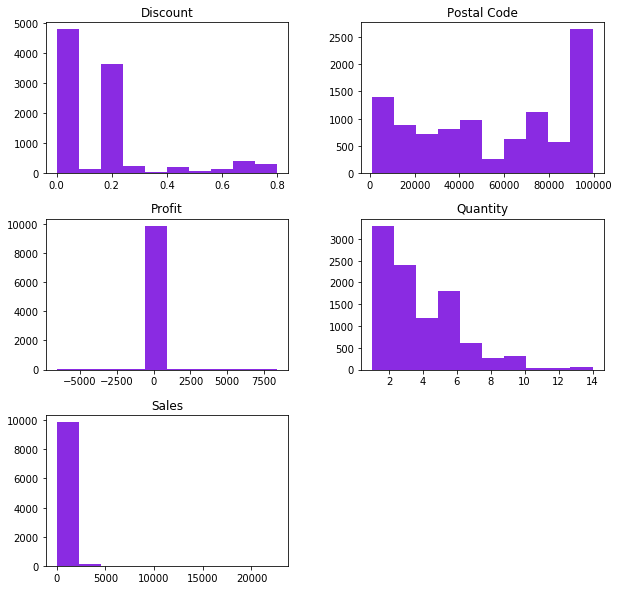

In [14]:
data.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

## PairPlot

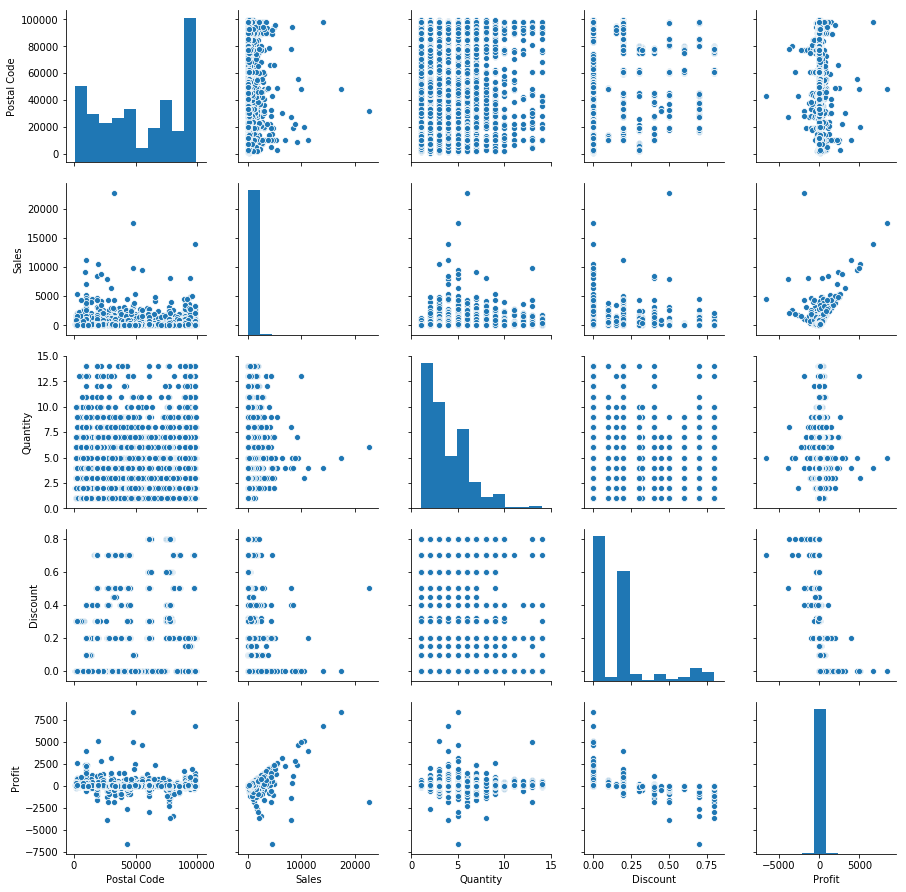

In [15]:
sns.pairplot(data.iloc[:,1:])

## BoxPlot

AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)


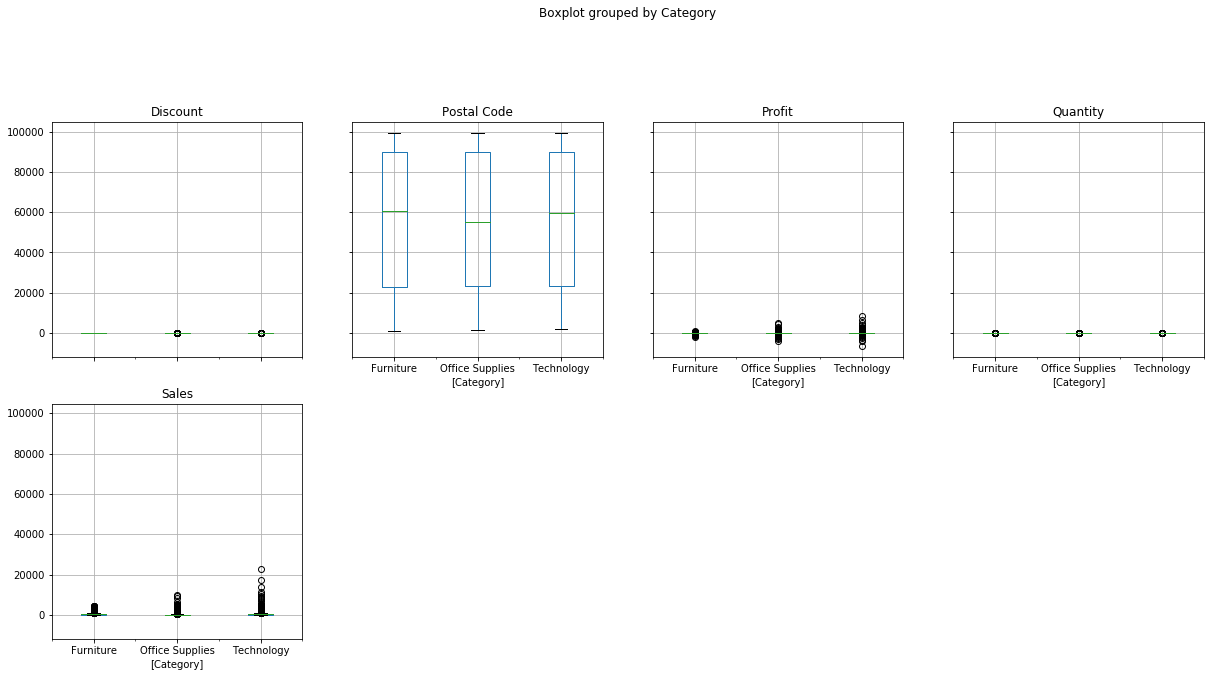

In [16]:
import matplotlib.pylab as plt

data.boxplot(by = 'Category',  layout=(4,4), figsize=(20, 20))
print(data.boxplot('Sales'))
print(data.boxplot('Quantity'))
print(data.boxplot('Discount'))
print(data.boxplot('Profit'))

## Calculate the correlation matrix

In [17]:
cor=data.corr()
cor

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


## Heatmap

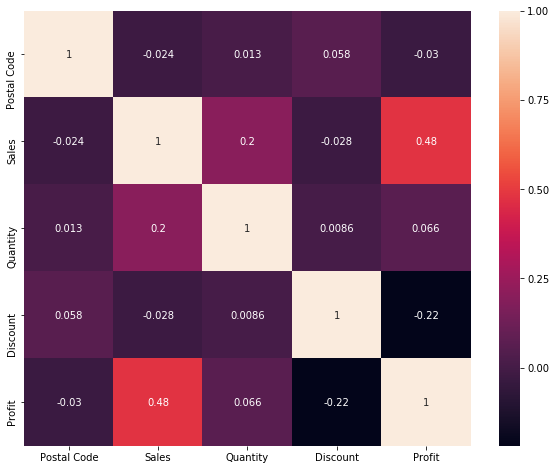

In [18]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

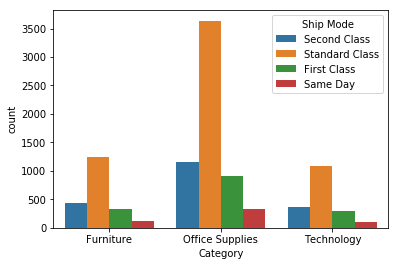

In [28]:
sns.countplot(x='Category',hue='Ship Mode',data=data)

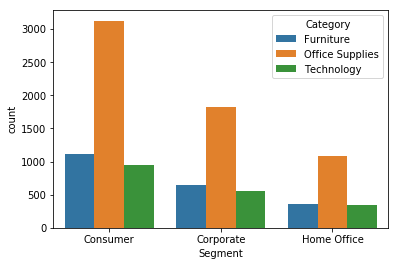

In [29]:
sns.countplot(x='Segment',data=data,hue='Category')

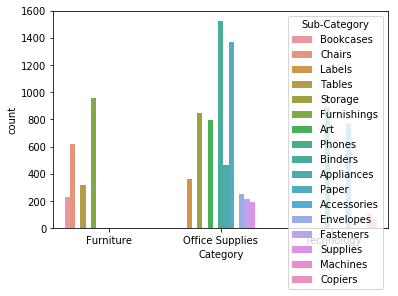

In [30]:
sns.countplot(x='Category',data=data,hue='Sub-Category')

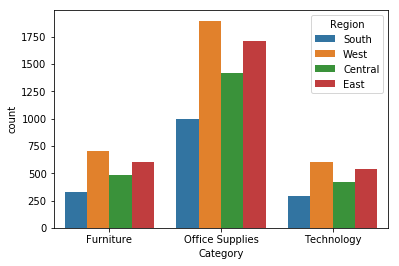

In [31]:
sns.countplot(x='Category',data=data,hue='Region')

## Profits based on the Category of Sales

In [20]:
print ("unique category: ",data['Category'].unique())

unique category:  ['Furniture' 'Office Supplies' 'Technology']


In [21]:
print ("profit based on Furniture:",data[data['Category']=='Furniture'].Profit.sum())
print ("profit based on Office Supplies:",data[data['Category']=='Office Supplies'].Profit.sum())
print ("profit based on Technology:",data[data['Category']=='Technology'].Profit.sum())

profit based on Furniture: 18451.272800000006
profit based on Office Supplies: 122490.8008
profit based on Technology: 145454.9481


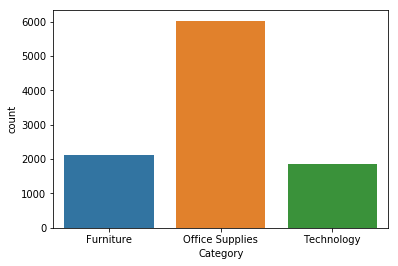

In [22]:
sns.countplot(data['Category'])

Text(0.5, 1.0, 'Distribution of Category by Sales and Quantity')

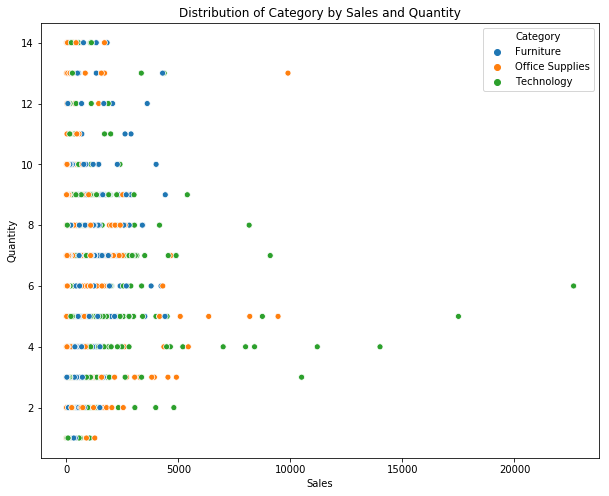

In [32]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Sales", y = "Quantity",data =data, hue = "Category")
plt.xlabel("Sales")
plt.ylabel("Quantity")
plt.title("Distribution of Category by Sales and Quantity")

## Check for negative records

In [23]:
data[data['Sales'] < 0]['Sales'].count()

0

In [24]:
data[data['Discount'] < 0]['Discount'].count()

0

In [25]:
data[data['Profit'] < 0]['Profit'].count()

1871

## Measure of skewness

In [26]:
data.skew(axis = 0, skipna = True) 

Postal Code    -0.128526
Sales          12.972752
Quantity        1.278545
Discount        1.684295
Profit          7.561432
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


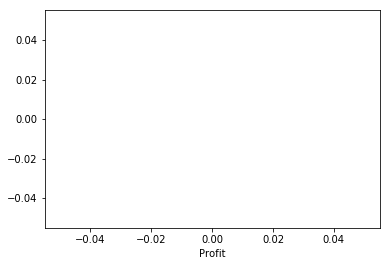

In [42]:
sns.distplot( data[data.Quantity == 0]['Profit'])

## Profits classified by Shipping modes of the Super-store sales

In [33]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [36]:
print('Profit by Standard  Class:',data[data['Ship Mode']=='Standard Class'].Profit.sum())
print('Profit by Second Class:',data[data['Ship Mode']=='Second Class'].Profit.sum())
print('Profit by First Class:',data[data['Ship Mode']=='First Class'].Profit.sum())
print('Profit by Same Day:',data[data['Ship Mode']=='Same Day'].Profit.sum())

Profit by Standard  Class: 164088.7875
Profit by Second Class: 57446.63540000001
Profit by First Class: 48969.8399
Profit by Same Day: 15891.7589


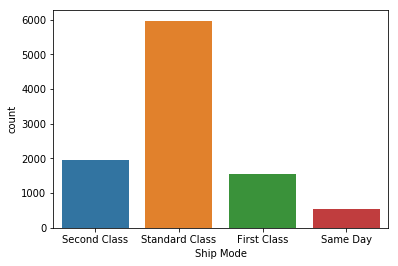

In [37]:
sns.countplot(data['Ship Mode'])

## Profits on the basis of different Segments

In [38]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [39]:
print('Profit by Consumer:',data[data['Segment']=='Consumer'].Profit.sum())
print('Profit by Corporate:',data[data['Segment']=='Corporate'].Profit.sum())
print('Profit by Home Office:',data[data['Segment']=='Home Office'].Profit.sum())

Profit by Consumer: 134119.2092
Profit by Corporate: 91979.13399999999
Profit by Home Office: 60298.678499999995


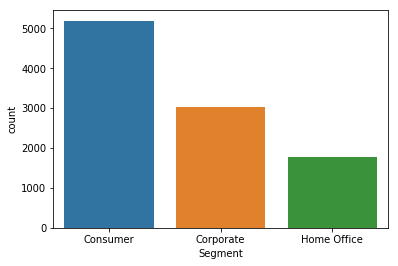

In [40]:
sns.countplot(data['Segment'])

# Conclusions:

## 1.Profit is very low by furniture.Have to tackel it.
## 2.Profits made by Office Supplies is normal.Here we can improve the sales by using recommendation system.
## 3.The profit per quantity/item is not consistent.Proper prices should be consider as increase in the no. of items.
## 4.Discounts should be properly maintain when there is increase in the number of items.
## 5.Increase the profits in these states: 'Ohio', 'Colorado', 'North Carolina', 'Tennessee', 'Pennsylvania', 'Texas', 'Illinois', 'Arizona', 'Oregon', 'Florida'